In [2]:
import numpy as np
from sklearn import preprocessing as pre
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
from api_helpers.team_stats_helpers import load_dataframe

nba_dataframe = load_dataframe(["PTS","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST"])
nba_dataframe = nba_dataframe.drop(nba_dataframe[nba_dataframe["FGA"] == 0].index)
nba_dataframe = nba_dataframe.reset_index(drop=True)

# label encoding
nba_dataframe["NBA_FINALS_APPEARANCE"].fillna(0.0, inplace=True)
nba_dataframe["NBA_FINALS_APPEARANCE"].replace("FINALS APPEARANCE", 0, inplace=True)
nba_dataframe["NBA_FINALS_APPEARANCE"].replace("LEAGUE CHAMPION", 1, inplace=True)

# le = pre.LabelEncoder()
# nba_dataframe["NBA_FINALS_APPEARANCE"] = le.fit_transform(nba_dataframe["TEAM_ID"])
nba_dataframe


/Users/akaman150/Desktop/nba_predictor_development/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,TEAM_ID,YEAR,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PTS
0,1610612737,1982-83,0.0,3352,7146,0.469,45,188,0.239,1586,2111,0.751,1139,2433,3572,1945,8335
1,1610612737,1983-84,0.0,3230,6809,0.474,23,106,0.217,1838,2414,0.761,1112,2232,3344,1827,8321
2,1610612737,1984-85,0.0,3444,7119,0.484,73,235,0.311,1782,2371,0.752,1161,2345,3506,2009,8743
3,1610612737,1985-86,0.0,3447,7029,0.490,33,166,0.199,1979,2704,0.732,1249,2405,3654,2025,8906
4,1610612737,1986-87,0.0,3435,7141,0.481,135,425,0.318,2019,2661,0.759,1350,2478,3828,2077,9024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1610612766,2019-20,0.0,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,6687
1182,1610612766,2020-21,0.0,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,7881
1183,1610612766,2021-22,0.0,3508,7497,0.468,1143,3130,0.365,1298,1753,0.740,888,2767,3655,2302,9457
1184,1610612766,2022-23,0.0,3385,7413,0.457,881,2669,0.330,1447,1933,0.749,901,2751,3652,2062,9098


In [4]:
from sklearn.utils import resample
team_data = nba_dataframe.drop(['TEAM_ID', 'YEAR'], axis=1)

# upscale minority class
team_data_majority = team_data[team_data.NBA_FINALS_APPEARANCE==0]
print(team_data_majority)
team_data_minority = team_data[team_data.NBA_FINALS_APPEARANCE==1]
minority_upsampled = resample(team_data_minority, replace=True, n_samples=team_data_minority.shape[0]*2, random_state=123)

team_data = pd.concat([team_data_majority, minority_upsampled])
# shuffling combined data
team_data = team_data.sample(frac=1).reset_index(drop=True)

team_result = team_data['NBA_FINALS_APPEARANCE']
team_data = team_data.drop('NBA_FINALS_APPEARANCE', axis=1)
print(team_data)


      NBA_FINALS_APPEARANCE   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM  \
0                       0.0  3352  7146   0.469    45   188    0.239  1586   
1                       0.0  3230  6809   0.474    23   106    0.217  1838   
2                       0.0  3444  7119   0.484    73   235    0.311  1782   
3                       0.0  3447  7029   0.490    33   166    0.199  1979   
4                       0.0  3435  7141   0.481   135   425    0.318  2019   
...                     ...   ...   ...     ...   ...   ...      ...   ...   
1181                    0.0  2425  5586   0.434   785  2231    0.352  1052   
1182                    0.0  2875  6324   0.455   985  2666    0.369  1146   
1183                    0.0  3508  7497   0.468  1143  3130    0.365  1298   
1184                    0.0  3385  7413   0.457   881  2669    0.330  1447   
1185                    0.0  3281  7133   0.460   989  2788    0.355  1189   

       FTA  FT_PCT  OREB  DREB   REB   AST   PTS  
0     2111  

In [262]:
# assess correlation
corr = nba_dataframe.drop(['TEAM_ID', 'YEAR'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PTS
NBA_FINALS_APPEARANCE,1.000000,0.071595,-0.001418,0.188598,0.019022,0.008006,0.051874,-0.011500,-0.007960,-0.012209,-0.005214,0.078137,0.062123,0.107327,0.060943
FGM,0.071595,1.000000,0.930205,0.665645,-0.018372,-0.023353,-0.259899,0.583409,0.540913,0.226537,0.503084,0.595330,0.792368,0.874974,0.959691
FGA,-0.001418,0.930205,1.000000,0.347639,0.060301,0.070469,-0.228773,0.513059,0.482924,0.179054,0.548541,0.663255,0.875755,0.763337,0.910358
FG_PCT,0.188598,0.665645,0.347639,1.000000,-0.148084,-0.182679,-0.165987,0.449551,0.402952,0.216080,0.156476,0.198357,0.257456,0.684542,0.610339
FG3M,0.019022,-0.018372,0.060301,-0.148084,1.000000,0.995438,0.623185,-0.454975,-0.510578,0.236908,-0.616257,0.527316,0.077703,-0.020341,0.193559
FG3A,0.008006,-0.023353,0.070469,-0.182679,0.995438,1.000000,0.580658,-0.457972,-0.509415,0.218699,-0.603387,0.527925,0.085776,-0.031296,0.187207
FG3_PCT,0.051874,-0.259899,-0.228773,-0.165987,0.623185,0.580658,1.000000,-0.355745,-0.398236,0.167683,-0.527558,0.210237,-0.134692,-0.193491,-0.099493
FTM,-0.011500,0.583409,0.513059,0.449551,-0.454975,-0.457972,-0.355745,1.000000,0.967833,0.169236,0.628843,0.179655,0.519500,0.489245,0.592091
FTA,-0.007960,0.540913,0.482924,0.402952,-0.510578,-0.509415,-0.398236,0.967833,1.000000,-0.080768,0.693965,0.129501,0.515935,0.448546,0.530551
FT_PCT,-0.012209,0.226537,0.179054,0.216080,0.236908,0.218699,0.167683,0.169236,-0.080768,1.000000,-0.228198,0.256240,0.079645,0.210999,0.307662


In [263]:
# drop features with small correlation to finals appearance
correlated_features = corr['NBA_FINALS_APPEARANCE'].sort_values(ascending=False)[:11].index
correlated_features = correlated_features.drop('NBA_FINALS_APPEARANCE')
refined_team_data = team_data[correlated_features]
refined_team_data

,FG_PCT,AST,DREB,FGM,REB,PTS,FG3_PCT,FG3M,FG3A,FGA
0,0.442,1891,2853,3093,3574,8601,0.351,824,2347,7000
1,0.494,2237,2699,3573,3481,9898,0.369,1128,3060,7232
2,0.475,1833,2615,2986,3445,8245,0.381,596,1564,6286
3,0.455,1809,2429,3298,3662,8684,0.358,270,754,7256
4,0.453,1771,2489,2923,3476,7888,0.363,507,1395,6450
...,...,...,...,...,...,...,...,...,...,...
2283,0.475,1833,2615,2986,3445,8245,0.381,596,1564,6286
2284,0.475,1954,2618,3069,3398,8220,0.365,645,1768,6463
2285,0.495,2491,2873,3532,3643,9503,0.383,982,2562,7140
2286,0.444,1573,2312,2831,3288,7680,0.329,341,1038,6372


In [283]:
# using Recursive Feature Elimination (RFE) to get best features
# Apply RFE
from sklearn.feature_selection import RFE
import sklearn.ensemble
import sklearn.linear_model

estimator = sklearn.ensemble.RandomForestRegressor() # using RandomForestRegressor is arbitrary, it worked better than logistic and linear
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(team_data, team_result)
rfe_selected_features = team_data.columns[selector.support_]
rfe_selected_features


Index(['FGA', 'FG_PCT', 'FG3M', 'FTM', 'FT_PCT', 'DREB', 'REB', 'PTS'], dtype='object')

In [287]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(team_data)
# pca.fit(team_data[rfe_selected_features])


PCA(n_components=6)

In [289]:
# rough svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(team_data[rfe_selected_features], team_result, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(team_data[rfe_selected_features], team_result, test_size=0.2, random_state=0)
refined_team_data
svm_model = svm.SVC(kernel='rbf') # choose between rbf and linear kernal
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [284]:
# rough knn model
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(team_data[rfe_selected_features], team_result, test_size=0.2, random_state=0)
knn_model = neighbors.KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [291]:
from sklearn.model_selection import GridSearchCV

# applying GridsearchCV to the model
param_grid = {
    # svm params
    # 'C': [1, 10, 100],                       # Regularization parameter
    
    # knn params
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
}

# grid search (make sure to selec the right model, svm_model or knn_model)
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='recall_macro')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_

accuracy is 0.967479674796748
mae is 0.032520325203252036
recall is 0.967479674796748
precision is 0.9734358430540827
r2 is 0.2991452991452993
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       234
         1.0       0.62      0.83      0.71        12

    accuracy                           0.97       246
   macro avg       0.81      0.90      0.85       246
weighted avg       0.97      0.97      0.97       246



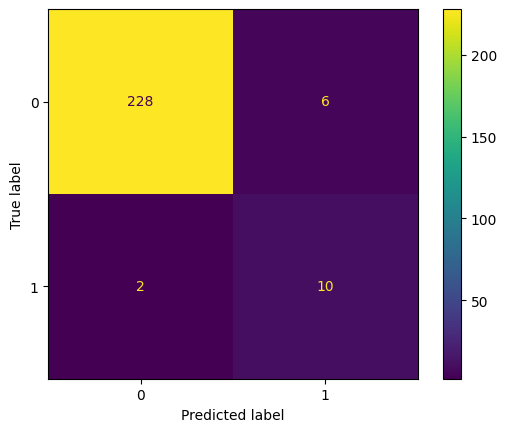

In [292]:
import sklearn.metrics as metrics
print('accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)))
print('mae is ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('recall is ' + str(metrics.recall_score(y_test, y_pred, average='weighted')))
print('precision is ' + str(metrics.precision_score(y_test, y_pred, average='weighted')))
print('r2 is ' + str(metrics.r2_score(y_test, y_pred)))


report = metrics.classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

#confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
disp.plot()
plt.show()

# SVM models
## radial kernal
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       228
         1.0       1.00      0.00      0.00        10

    accuracy                           0.96       238
   macro avg       0.98      0.50      0.49       238
weighted avg       0.96      0.96      0.94       238

## linear kernel
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       228
         1.0       1.00      0.10      0.18        10

    accuracy                           0.96       238
   macro avg       0.98      0.55      0.58       238
weighted avg       0.96      0.96      0.95       238


# Knn model
## Using rfe features:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       228
         1.0       1.00      0.00      0.00        10

    accuracy                           0.96       238
   macro avg       0.98      0.50      0.49       238
weighted avg       0.96      0.96      0.94       238
